In [2]:
import math
import random
import re

import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [3]:
top_words = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = top_words)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test[0])
print(y_test[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(25000,)
(25000,)
(25000,)
(25000,)
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
0


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
<class 'dict'>
88584
the
and
a
of
to
direct
[Example] lengths of 5 reviews:  [218, 189, 141, 550, 147]
The longest length of the review : 2494
THe average length of the review : 238.71364


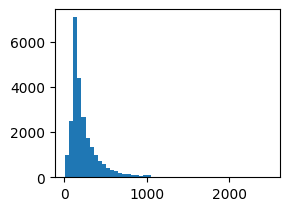

In [4]:
word_to_index = tf.keras.datasets.imdb.get_word_index()
print(type(word_to_index))
print(len(word_to_index.items()))

index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value + 3] = key

for i in range(5):
    print(index_to_word[i + 4])

print(index_to_word[1504])

len_result = [len(s) for s in x_train]
print('[Example] lengths of 5 reviews: ', len_result[:5])
print('The longest length of the review : {}'.format(np.max(len_result)))
print('THe average length of the review : {}'.format(np.mean(len_result)))

plt.subplot(2, 2, 2)
plt.hist(len_result, bins = 50)
plt.show()

In [5]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token
print(x_train[2])
print(' '.join([index_to_word[index] for index in x_train[2]]))
print(y_train[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
<sos> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actu

In [6]:
max_len = 200
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = 200)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = 200)

In [7]:
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = tf.keras.callbacks.ModelCheckpoint('./best_model.keras', monitor = 'val_accuracy', mode = 'max',
                                       verbose = 1, save_best_only = True)

In [9]:
rnn = tf.keras.Sequential()
rnn.add(layers.Embedding(top_words, 160))
rnn.add(layers.SimpleRNN(64))
rnn.add(layers.Dense(1, activation = 'sigmoid'))
rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
rnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = rnn.fit(x_train, y_train, epochs = 5, callbacks = [es, mc], batch_size = 60, validation_split = 0.2)

Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6273 - loss: 0.6155
Epoch 1: val_accuracy improved from -inf to 0.68340, saving model to ./best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.6276 - loss: 0.6152 - val_accuracy: 0.6834 - val_loss: 0.5775
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7972 - loss: 0.4414
Epoch 2: val_accuracy improved from 0.68340 to 0.80720, saving model to ./best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.7973 - loss: 0.4412 - val_accuracy: 0.8072 - val_loss: 0.4236
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8796 - loss: 0.2919
Epoch 3: val_accuracy did not improve from 0.80720
334/334 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.8796 - loss: 0.2918 - val_accuracy: 0.8068 - val_loss: 0.4317
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9174 - loss: 0.2109
Epoch 4: val_accuracy did not improve from 0.80720
334/334 ━━━━━━━━━━

In [11]:
rnn.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7913 - loss: 0.5990


[0.5982612371444702, 0.7923600077629089]

In [12]:
loaded_model = tf.keras.models.load_model('best_model.keras')
print((loaded_model.evaluate(x_test, y_test)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8062 - loss: 0.4228
[0.41440466046333313, 0.8128799796104431]


In [17]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub('[^0-9a-zA-Z]', '', new_sentence).lower()
    
    encoded = []
    for word in new_sentence.split():
        try:
            if word_to_index[word] <= 10000:
                encoded.append(word_to_index[word] + 3)
            else:
                encoded.append(2)
        except KeyError:
            encoded.append(2)
    
    pad_new = tf.keras.preprocessing.sequence.pad_sequences([encoded], maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        print("positive with the probability {:.2f}% .".format(score * 100))
    else:
        print("negative with the probability {:.2f}% ".format((1 - score) * 100))

In [18]:
My_review_1 = "hi this movie is the amazing movie I have ever seen in my life. really intersting very fun."
sentiment_predict(My_review_1)
My_review_2 = "The final scene at the movie was disgusting"
sentiment_predict(My_review_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
positive with the probability 96.67% .
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
positive with the probability 96.67% .


In [19]:
lstm = tf.keras.Sequential()
lstm.add(layers.Embedding(top_words, 160))
lstm.add(layers.LSTM(64))
lstm.add(layers.Dense(2, activation = 'softmax'))
lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print("Train LSTM Model With")

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1,
                                                 stratify = y_train)

lstm.fit(x_train, y_train, epochs = 5, callbacks = [es, mc], batch_size = 60, validation_data = (x_val, y_val))

Train LSTM Model With
Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6804 - loss: 0.5688
Epoch 1: val_accuracy improved from 0.80720 to 0.85040, saving model to ./best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 57s 164ms/step - accuracy: 0.6807 - loss: 0.5685 - val_accuracy: 0.8504 - val_loss: 0.3475
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8836 - loss: 0.2844
Epoch 2: val_accuracy improved from 0.85040 to 0.87040, saving model to ./best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 55s 163ms/step - accuracy: 0.8836 - loss: 0.2843 - val_accuracy: 0.8704 - val_loss: 0.3453
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9261 - loss: 0.1987
Epoch 3: val_accuracy did not improve from 0.87040
334/334 ━━━━━━━━━━━━━━━━━━━━ 54s 162ms/step - accuracy: 0.9261 - loss: 0.1987 - val_accuracy: 0.8668 - val_loss: 0.3759
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9317 - loss: 0.1760
Epoch 4: val_accuracy did not improve

In [21]:
rnn.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7913 - loss: 0.5990


[0.5982612371444702, 0.7923600077629089]

In [23]:
loaded_model2 = tf.keras.models.load_model('best_model.keras')
print((loaded_model2.evaluate(x_test, y_test)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8595 - loss: 0.3759
[0.3744369149208069, 0.8597999811172485]


In [25]:
multi_lstm = tf.keras.Sequential()
multi_lstm.add(layers.Embedding(top_words, 160))
multi_lstm.add(layers.LSTM(64, return_sequences = True))
multi_lstm.add(layers.LSTM(64))
multi_lstm.add(layers.Dense(2, activation = 'softmax'))

multi_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print("Train Multi_LSTM")
multi_lstm.fit(x_train, y_train, epochs = 5, callbacks = [es, mc], batch_size = 60,
              validation_data = (x_val, y_val))

Train Multi_LSTM
Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.7082 - loss: 0.5270
Epoch 1: val_accuracy did not improve from 0.87040
334/334 ━━━━━━━━━━━━━━━━━━━━ 105s 304ms/step - accuracy: 0.7085 - loss: 0.5267 - val_accuracy: 0.8638 - val_loss: 0.3524
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8900 - loss: 0.2762
Epoch 2: val_accuracy did not improve from 0.87040
334/334 ━━━━━━━━━━━━━━━━━━━━ 101s 302ms/step - accuracy: 0.8901 - loss: 0.2762 - val_accuracy: 0.8658 - val_loss: 0.3265
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9173 - loss: 0.2186
Epoch 3: val_accuracy did not improve from 0.87040
334/334 ━━━━━━━━━━━━━━━━━━━━ 101s 302ms/step - accuracy: 0.9173 - loss: 0.2186 - val_accuracy: 0.8570 - val_loss: 0.4028
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.9366 - loss: 0.1730
Epoch 4: val_accuracy did not improve from 0.87040
334/334 ━━━━━━━━━━━━━━━━━━━━ 101s 302ms/step - accuracy: 0.9366 - lo

In [27]:
loaded_model = tf.keras.models.load_model('best_model.keras')
print((loaded_model.evaluate(x_test, y_test)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.8595 - loss: 0.3759
[0.3744369149208069, 0.8597999811172485]
